In [63]:
import pandas as pd
import numpy as np

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# train.isnull()

<Axes: >

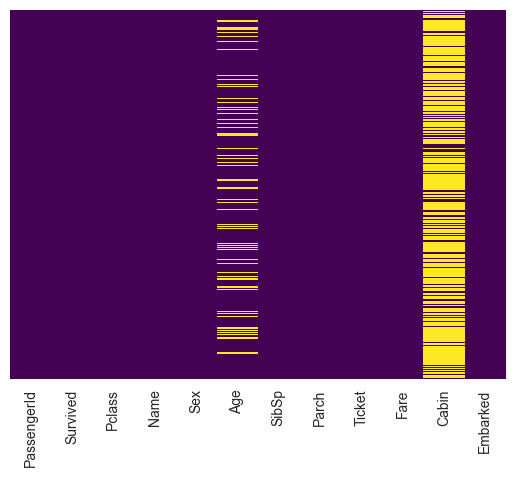

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

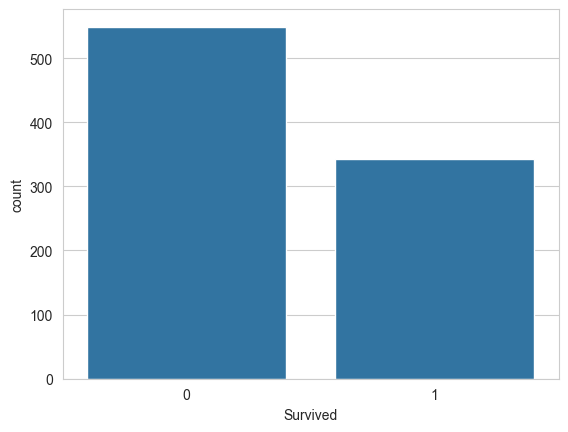

In [69]:
sns.countplot(x='Survived',data=train)
# sns.countplot()

<Axes: xlabel='Survived', ylabel='count'>

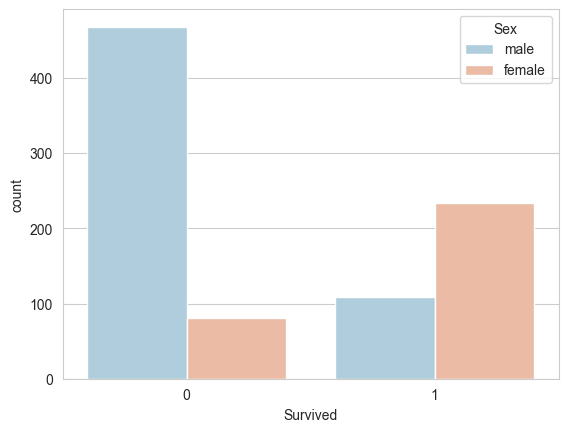

In [70]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [71]:
# sns.countplot(x='Survived',hue='Pclass',data='train')

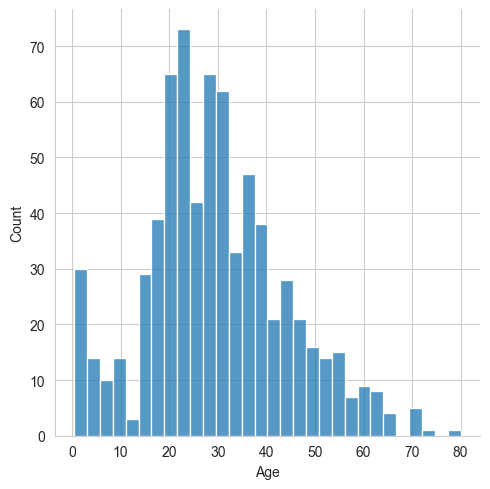

In [72]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


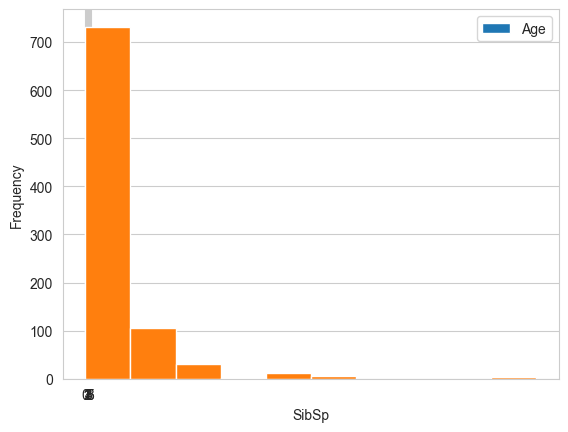

In [73]:
train['Age'].plot.hist()
train.info()
sns.countplot(x='SibSp',data=train)
train['Fare'].hist()
import cufflinks as cf
cf.go_offline()

                # Part two

<Axes: xlabel='Pclass', ylabel='Age'>

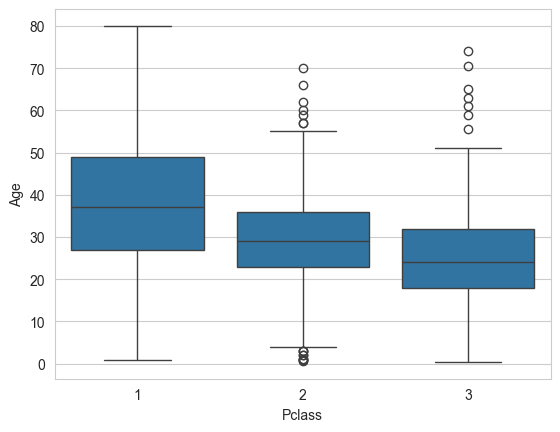

In [74]:
sns.boxplot(x='Pclass',y='Age',data=train)

C:\Users\annae\AppData\Local\Temp\ipykernel_3708\3931211369.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\annae\AppData\Local\Temp\ipykernel_3708\3931211369.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

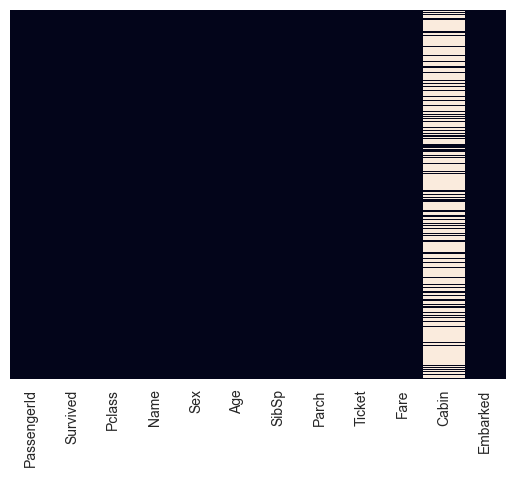

In [75]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        Pclass==1
        return 37
    elif Pclass==2:
        return 29
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [76]:
# train.drop('Cabin',axis=1,inplace=True)
train.head()
train.dropna(inplace=True)
# pd.get_dummies(train['Sex'])
# sex=pd.get_dummies(train['Sex'],drop_first=True)
# embark=pd.get_dummies(train['Embarked'],drop_first=True)
train=pd.concat([train,sex,embark],axis=1)
train.head(2)
# train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()
# drop('PassengerId',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,False,False,False
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,False,False,True
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,True,False,True
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S,False,False,True
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S,False,False,True


In [83]:
x=train.drop('Survived',axis=1)
y=train['Survived']
from Sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=101)
from Sklearn.linear_model import Logistic Regression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
from Sklearn.metrics import classification_report
print(classification_report(y_test,Prediction))
from Sklearn.metrics import confusion_matrix
confusion_matrix(y_train,Prediction)

SyntaxError: invalid syntax (2770360278.py, line 5)

In [53]:
import scipy
print(scipy.__version__)

1.14.1
